In [67]:
from os import walk
import os
import subprocess
import sys
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import time
import json
import re
import urllib2
import unicodedata

wordnet_tags = ['n', 'v', 'a', 's', 'r']
%matplotlib inline

In [403]:
path        = os.path.abspath(os.getcwd())
TESTDIR     = os.path.normpath(os.path.join(os.path.expanduser("~"),"projects","LC3-Creations", "examples","KDDsample"))

corpus = {}

start_time = time.time()
for dirName, subdirList, fileList in walk(TESTDIR):
        for fileName in fileList:
            if fileName.startswith('p') and fileName.endswith('.pdf'):
                a = unicode(subprocess.check_output(['pdf2txt.py',str(os.path.normpath(os.path.join(TESTDIR,fileName)))]),errors='ignore')
                document = unicodedata.normalize('NFKD', a).encode('ascii','ignore')
                # Getting title
                title = re.findall("^[^\\n\\n]+",document)[0]
                
                # Getting the abstract
                abstract = re.findall (r'\n\n(Abstract|ABSTRACT)([^]]*)\n\n',document[:2000])[0]
                if isinstance(abstract, tuple):
                    abstract = re.sub('[\s]'," ",abstract[1])
                else:
                    abstract = re.sub('[\s]'," ",abstract)
                    
                # Extracts section with names and email addresses only
                section  = re.findall (r'\n\n([^]]*)\n\n(Abstract|ABSTRACT)',document[:2000])

                type(section[0][0])

                if isinstance(section, list):
                    section = re.sub('[\s]'," ",section[0][0])
                else:
                    section = re.sub('[\s]'," ",section)
                section

                # Code to extract entities from top section of pdf and store a relationship tree
                tagged = nltk.pos_tag(nltk.word_tokenize(section))
                entities = nltk.chunk.ne_chunk(tagged)
                
                # Creates the json document format to store the files
                corpus[str(fileName)]={}
                corpus[str(fileName)]={'Title':title,'Abstract':abstract,'Entities':entities}
                
                 
    


# This is a placeholder to test out the code

In [405]:
corpus

{'p19.pdf': {'Abstract': '  We present a method called TIMEMACHINE to generate a time- line of events and relations for entities in a knowledge base. For example for an actor, such a timeline should show the most impor- tant professional and personal milestones and relationships such as works, awards, collaborations, and family relationships. We de- velop three orthogonal timeline quality criteria that an ideal time- line should satisfy: (1) it shows events that are relevant to the en- tity; (2) it shows events that are temporally diverse, so they dis- tribute along the time axis, avoiding visual crowding and allowing for easy user interaction, such as zooming in and out; and (3) it shows events that are content diverse, so they contain many differ- ent types of events (e.g., for an actor, it should show movies and marriages and awards, not just movies). We present an algorithm to generate such timelines for a given time period and screen size, based on submodular optimization and web-

In [338]:
# Convert document from unicode to string 

import unicodedata
document = unicodedata.normalize('NFKD', a).encode('ascii','ignore')
document[:2500]

'Timeline Generation for Knowledge-Base Entities\n\nTimeMachine:\n\nTim Althoff*, Xin Luna Dong, Kevin Murphy, Safa Alai, Van Dang, Wei Zhang\n\n*Computer Science Department, Stanford University, Stanford, CA 94305\n\nGoogle, 1600 Amphitheatre Parkway, Mountain View, CA 94043\n\n*althoff@cs.stanford.edu {lunadong, kpmurphy, safa, vandang, weizh}@google.com\n\nABSTRACT\n\nWe present a method called TIMEMACHINE to generate a time-\nline of events and relations for entities in a knowledge base. For\nexample for an actor, such a timeline should show the most impor-\ntant professional and personal milestones and relationships such as\nworks, awards, collaborations, and family relationships. We de-\nvelop three orthogonal timeline quality criteria that an ideal time-\nline should satisfy: (1) it shows events that are relevant to the en-\ntity; (2) it shows events that are temporally diverse, so they dis-\ntribute along the time axis, avoiding visual crowding and allowing\nfor easy user inter

In [388]:
# Getting title
title = re.findall("^[^\\n\\n]+",document)[0]
title

# Getting the abstract
abstract = re.findall (r'\n\n(Abstract|ABSTRACT)([^]]*)\n\n',document[:2000])[0]

if isinstance(abstract, tuple):
    abstract = re.sub('[\s]'," ",abstract[1])
else:
    abstract = re.sub('[\s]'," ",abstract)
abstract

'  We present a method called TIMEMACHINE to generate a time- line of events and relations for entities in a knowledge base. For example for an actor, such a timeline should show the most impor- tant professional and personal milestones and relationships such as works, awards, collaborations, and family relationships. We de- velop three orthogonal timeline quality criteria that an ideal time- line should satisfy: (1) it shows events that are relevant to the en- tity; (2) it shows events that are temporally diverse, so they dis- tribute along the time axis, avoiding visual crowding and allowing for easy user interaction, such as zooming in and out; and (3) it shows events that are content diverse, so they contain many differ- ent types of events (e.g., for an actor, it should show movies and marriages and awards, not just movies). We present an algorithm to generate such timelines for a given time period and screen size, based on submodular optimization and web-co-occurrence statis- tic

In [401]:
# Extracts section with names and email addresses only

section  = re.findall (r'\n\n([^]]*)\n\n(Abstract|ABSTRACT)',document[:2000])

type(section[0][0])

if isinstance(section, list):
    section = re.sub('[\s]'," ",section[0][0])
else:
    section = re.sub('[\s]'," ",section)
section


'TimeMachine:  Tim Althoff*, Xin Luna Dong, Kevin Murphy, Safa Alai, Van Dang, Wei Zhang  *Computer Science Department, Stanford University, Stanford, CA 94305  Google, 1600 Amphitheatre Parkway, Mountain View, CA 94043  *althoff@cs.stanford.edu {lunadong, kpmurphy, safa, vandang, weizh}@google.com'

In [384]:
test = re.findall (r'\n\n([^]]+)\n\n(Abstract|ABSTRACT)',document[:2000] )

if isinstance(test, str):
    print "Wow"
elif isinstance (test,int):
    print "I'm surprised!"

elif  isinstance (test,list):
    print "We got it RIGHT!"

else:
    print "Nothing fits"


We got it RIGHT


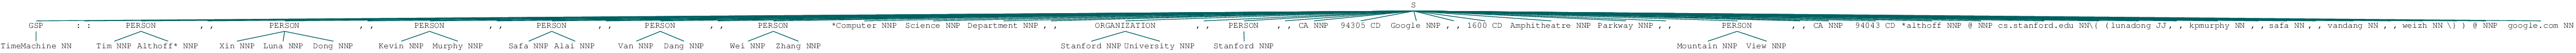

In [402]:
# Code to extract entities from top section of pdf and store a relationship tree

import nltk

tagged = nltk.pos_tag(nltk.word_tokenize(section))
entities = nltk.chunk.ne_chunk(tagged)
entities

In [307]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print type(ENGLISH_STOP_WORDS)
print type(nltk.corpus.stopwords.words('english'))

<type 'frozenset'>
<type 'list'>


In [314]:
a= [l for l in ENGLISH_STOP_WORDS]
b = [l for l in nltk.corpus.stopwords.words('english')]

len(set(a) & set(b))

118

In [301]:
# Creates the json document format to store the files

corpus = {}
corpus[str(fileName)]={}
corpus[str(fileName)]={'Title':title,'Abstract':abstract,'Entities':entities}
corpus['p99.pdf']={'Title':"Test title",'Abstract':"test abstract langauge.  Just adding test to make it longer", 'Entities':"Linwood Creekmore"}

corpus.keys()



['ptest.pdf', 'p99.pdf']

In [155]:
import requests, unicodedata
text = urllib2.urlopen('http://www.constitution.org/cons/constitu.txt')
constitution = requests.get('http://www.constitution.org/cons/constitu.txt')

const = unicodedata.normalize('NFKD', constitution.text).encode('ascii','ignore')
type(const)

str

In [48]:
text = ' '.join(re.findall('[\w]+',const))
type(text)

str

<matplotlib.colorbar.Colorbar instance at 0x10c3d8998>


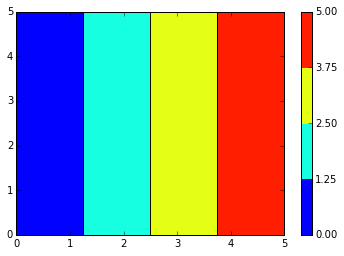

In [156]:
from os import path
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# read the mask / color image
# taken from http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
from PIL import Image
import requests
from StringIO import StringIO

response = requests.get("http://www.personal.psu.edu/sdh5174/Mario_png.png")

mario_coloring = np.array(Image.open(StringIO(response.content)))

wc = WordCloud(background_color="white", max_words=2000, mask=mario_coloring,
               stopwords=STOPWORDS.add("said"),
               max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mario_coloring)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(mario_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

TypeError: expected string or buffer

In [23]:
from statsmodels.datasets import cancer
import statsmodels.api as sm

In [25]:
data = sm.datasets.get_rdataset("Duncan", "car")

In [26]:
data

<class 'statsmodels.datasets.utils.Dataset'>

In [28]:
print data.__doc__

+----------+-------------------+
| Duncan   | R Documentation   |
+----------+-------------------+

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

    Duncan

Format
~~~~~~

This data frame contains the following columns:

type
    Type of occupation. A factor with the following levels: ``prof``,
    professional and managerial; ``wc``, white-collar; ``bc``,
    blue-collar.

income
    Percent of males in occupation earning $3500 or more in 1950.

education
    Percent of males in occupation in 1950 who were high-school
    graduates.

prestige
    Percent of raters in NORC study rating occupation as excellent or
    good in prestige.

Source
~~~~~~

Duncan, O. D. (1961) A socioeconomic index for all occupations. In
Reiss, A. J., Jr. (Ed.) *Occupations and Social Status.* Free Press
[Ta

In [30]:
sm.

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


In [34]:
import statsmodels.api as sm
air = sm.datasets.get_rdataset("airquality")

In [36]:
type(air.data)

pandas.core.frame.DataFrame

In [37]:
air.data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000
